<a href="https://colab.research.google.com/github/prabhupr70/DevTownSeeTheWorldThroughAI-ColabFiles-Day03/blob/main/ObjectDetection_Day03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# See The World Thru AI

## Day 3: Live webcam detection
### [YouTube Video](https://www.youtube.com/live/EsmoQUrtcs0)
### [Attendance Form](https://docs.google.com/forms/d/e/1FAIpQLSdUAy9wDitLXieNFd1hchLlWukIHIjVVUiOCFNDm9x8G1o9jw/viewform)
### Goal: Detect objects from webcam feed in realtime.
*   Use OpenCVs webcam capture
*   Display detection in realtime window

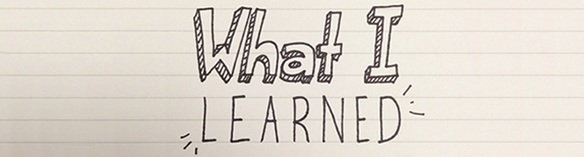
1.   "from google.colab import output" this will let us interack between Collab & Chrome Browser webcam to take videos + pictures
2.   "from base64 import b64decode" this will let you decode B64 coded images
3.   "import output" will let us download videos + pictures
4.   "const imgData = canvas.toDataURL('image/jpeg').split(',') [1];".  Here I had double quotes after the word jpeg & that was causing many compile issue. The troubleshooting exercise taught me a lot.
5.   "takephoto". In some place I had it as "takePhoto" with letter "p" in uppercase. The troubleshooting exercise taught me a lot.
6.   I never thought missed indentation would impact the code-behavior

In [ ]:
#*********************************************************
# Download & Install all Python packages/modules/libraries
# ultralytics: Used in YOLO. It constains predefined model
# opencv-python-headlesss: Without GUI how to do thr work using this package
# pillow: Image processing library
#*********************************************************
!pip install -q ultralytics opencv-python-headless matplotlib pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 28.5 MB/s eta 0:00:00


Captured:  snapshot.jpg

image 1/1 /content/snapshot.jpg: 480x640 2 persons, 1 refrigerator, 1 book, 6.7ms
Speed: 1.7ms preprocess, 6.7ms inference, 2.3ms postprocess per image at shape (1, 3, 480, 640)


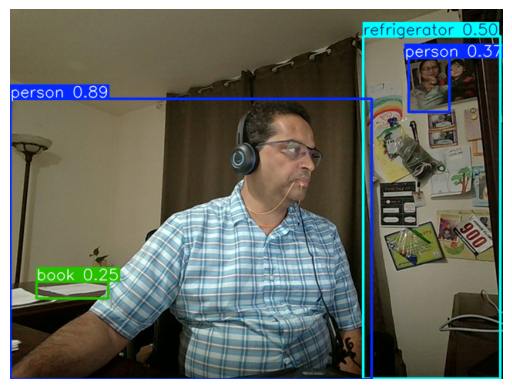

In [ ]:
#**************************************************
# Load all the installed packages/modules/libraries
#**************************************************
from ultralytics import YOLO
import cv2
from matplotlib import pyplot as plt
from PIL import Image
from google.colab import output
from base64 import b64decode

model=YOLO('yolov8n.pt')

def take_photo(filename ='snapshot.jpg'):
    js = """
    async function takePhoto() {
       const div = document.createElement('div');
       const capture = document.createElement('button');
       capture.textContent = 'Capture';
       div.appendChild(capture);
       document.body.appendChild(div);

       const video = document.createElement('video');
       video.style.display = 'block';
       const stream = await navigator.mediaDevices.getUserMedia({video: true});
       document.body.appendChild(video);
       video.srcObject = stream;
       await video.play();

       // Resize window
       google.colab.output.setIframeHeight (document.documentElement.scrollHeight, true);

       // Wait for Capture button
       await new Promise((resolve) => capture.onclick =resolve);

       const canvas = document.createElement('canvas');
       canvas.width = video.videoWidth;
       canvas.height = video.videoHeight;
       canvas.getContext('2d').drawImage(video, 0, 0);
       stream.getTracks().forEach(track=> track.stop());
       const imgData = canvas.toDataURL('image/jpeg').split(',') [1];
       div.remove();
       return imgData;
    }
    takePhoto();
    """
    data = output.eval_js(js)
    with open(filename, 'wb') as f:
        f.write(b64decode(data))
    return filename

filename = take_photo('snapshot.jpg')
print ("Captured: ", filename)

results = model(filename)
annotated = results[0].plot()
plt.imshow(cv2.cvtColor(annotated, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

Here are the pictures I took using my laptop camera


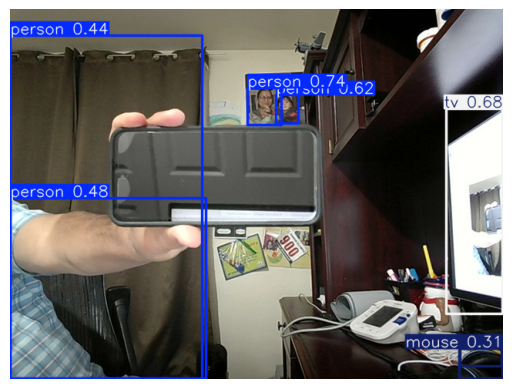

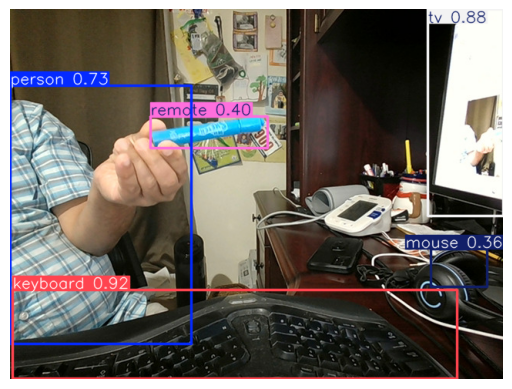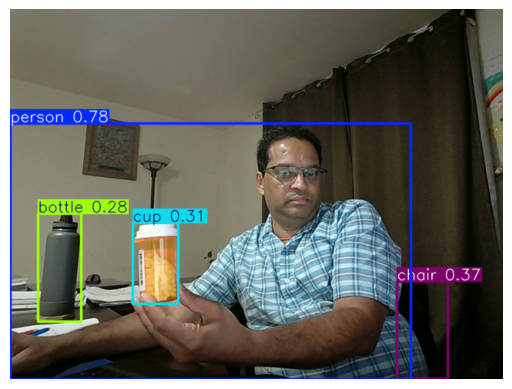